In [ ]:
import pickle
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras as K
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Input, Dense, Activation, BatchNormalization, Flatten # only use these layers
from tensorflow.keras.models import Model
import tensorflow.keras.optimizers
import math
from tensorflow.keras.layers import Input
from tensorflow.keras.applications.resnet import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential, Model
from google.colab import files
from os import path
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## This opens a *.pkl file

def unpickle(filename):
    with open(filename, "rb") as f:
        data = pickle.load(f)
    return data

# this saves "thing" to a *.pkl file
def to_pickle(thing, filename):
    with open(filename, "wb") as f:
        pickle.dump(thing, f)
        f.close()

In [ ]:
train = unpickle("/content/drive/MyDrive/train.pkl")
test = unpickle('/content/drive/MyDrive/test.pkl')
print(train["data"].shape)
print(train["label"].shape)

(10000, 12288)
(10000,)


In [ ]:
# label dictionary: this maps label integer to the name of the animal
label2name = {1: 'dog',
              2: 'rabbit',
              3: 'deer',
              4: 'elephant',
              5: 'horse',
              6: 'squirrel',
              7: 'tiger',
              8: 'wolf',
              9: 'chimpanzee',
              10: 'panda'}

In [ ]:
# this plot one image given the image index
def show_image(idx, train, label2name=label2name):
    img = train["data"][idx]
    img = np.dstack((img[:4096], img[4096:8192], img[8192:])).reshape(64,64,3)
    plt.imshow(img)
    plt.title(label2name[train["label"][idx]])
    plt.show()

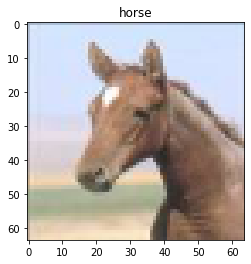

In [ ]:
show_image(2, train)

##Normalizing data

In [ ]:
X = np.dstack((train['data'][:, :4096], train['data'][:, 4096:8192], train['data'][:, 8192:])).reshape(-1, 64,64,3)
y = train['label'] - 1
X_val = np.dstack((test['data'][:, :4096], test['data'][:, 4096:8192], test['data'][:, 8192:])).reshape(-1, 64,64,3)

X_not_norm = np.copy(X)

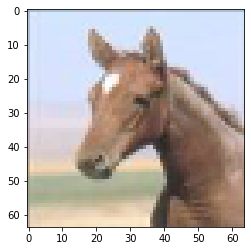

In [ ]:
plt.imshow(X[2])

##Pre-process data for other models

In [ ]:
X_RN50 = K.applications.resnet50.preprocess_input(X_not_norm)
X_Xcept = K.applications.xception.preprocess_input(X_not_norm)

# X_train, X_test = X_not_norm[:8000], X_not_norm[8000:]
# y_train, y_test = y[:8000], y[8000:]
# X_RN50_train = K.applications.resnet50.preprocess_input(X_train)
# X_RN50_test = K.applications.resnet50.preprocess_input(X_test)

X_Xcept_val = K.applications.xception.preprocess_input(X_val)
X_RN50_val = K.applications.resnet50.preprocess_input(X_val)

##RN50

In [ ]:
# base_model = K.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(350, 350, 3), classes=10)
# initializer = K.initializers.HeNormal()

# freeze_num = int(len(base_model.layers) * 3 / 4)
# for layer in base_model.layers[:130]:
#   layer.trainable = False
#   # else:
#     # layer.kernel_regularizer = K.regularizers.l1_l2(l1=1e-5, l2=1e-4)

# res = (350, 350)
# batch_size = 32
# epochs = 10

# datagen = K.preprocessing.image.ImageDataGenerator(
#                                           rotation_range=40,
#                                           width_shift_range=0.2,
#                                           height_shift_range=0.2,
#                                           shear_range=0.2,
#                                           zoom_range=0.2,
#                                           horizontal_flip=True,
#                                           validation_split = .2,
#                                           fill_mode='nearest')
# train_gen = datagen.flow(X_RN50,
#                              y,
#                              subset = 'training',
#                              batch_size=32)

# val_gen = datagen.flow(X_RN50,
#                             y,
#                             subset = 'validation',
#                             batch_size=32)

# tmod = Sequential()
# tmod.add(K.layers.Lambda(lambda image: tf.image.resize(image, res)))
# tmod.add(base_model)
# tmod.add(GlobalAveragePooling2D())
# tmod.add(BatchNormalization())
# # tmod.add(Dense(1024,kernel_initializer=initializer, kernel_regularizer='l1'))
# # tmod.add(BatchNormalization())
# # tmod.add(K.layers.Activation('relu'))
# # tmod.add(Dropout(.2))
# tmod.add(Dense(256, kernel_initializer=initializer, kernel_regularizer='l1'))
# tmod.add(BatchNormalization())
# tmod.add(K.layers.Activation('relu'))
# # tmod.add(Dropout(.1))

# tmod.add(Dense(128,kernel_initializer=initializer, kernel_regularizer='l1'))
# tmod.add(BatchNormalization())
# tmod.add(K.layers.Activation('relu'))
# # tmod.add(Dropout(.05))

# tmod.add(Dense(10, activation = 'softmax'))

# tmod.compile(loss='sparse_categorical_crossentropy', optimizer=K.optimizers.SGD(learning_rate=6e-3, momentum = .9),
#               metrics=['accuracy'])
# rn50_history = tmod.fit(train_gen, epochs = epochs, batch_size = batch_size, validation_data = val_gen, verbose = 1)
# # base_model.summary()

Epoch 1/10
250/250 [==============================] - 110s 424ms/step - loss: 35.6989 - accuracy: 0.7654 - val_loss: 7.9594 - val_accuracy: 0.5760
Epoch 2/10
250/250 [==============================] - 105s 421ms/step - loss: 5.6213 - accuracy: 0.7990 - val_loss: 5.3572 - val_accuracy: 0.7595
Epoch 3/10
 47/250 [====>.........................] - ETA: 1:12 - loss: 4.9444 - accuracy: 0.8318

KeyboardInterrupt: ignored

##Xception

In [ ]:
base_model = K.applications.Xception(weights='imagenet', include_top=False, input_shape=(350, 350, 3))
initializer = K.initializers.HeNormal()

# for layer in base_model.layers[:110]:
#   layer.trainable = False
  # else:
    # layer.kernel_regularizer = K.regularizers.l1_l2(l1=1e-5, l2=1e-4)

res = (350, 350)
batch_size = 32
epochs = 5

xcept_mod = Sequential()
xcept_mod.add(K.layers.Lambda(lambda image: tf.image.resize(image, res)))
xcept_mod.add(base_model)
xcept_mod.add(GlobalAveragePooling2D())
xcept_mod.add(BatchNormalization())

xcept_mod.add(Dense(256,kernel_initializer=initializer))
xcept_mod.add(BatchNormalization())
xcept_mod.add(K.layers.Activation('relu'))

xcept_mod.add(Dense(128,kernel_initializer=initializer))
xcept_mod.add(BatchNormalization())
xcept_mod.add(K.layers.Activation('relu'))
# xcept_mod.add(Dropout(.05))

xcept_mod.add(Dense(10, activation = 'softmax'))

xcept_mod.compile(loss='sparse_categorical_crossentropy', optimizer=K.optimizers.SGD(learning_rate=6e-3, momentum = .9),
              metrics=['accuracy'])
xcept_history = xcept_mod.fit(X_Xcept, y, epochs = epochs, batch_size = batch_size, validation_split=.2, verbose = 1)
# base_model.summary()

Epoch 1/10
250/250 [==============================] - 456s 2s/step - loss: 0.3315 - accuracy: 0.9011 - val_loss: 0.3281 - val_accuracy: 0.9535
Epoch 2/10
250/250 [==============================] - 422s 2s/step - loss: 0.0779 - accuracy: 0.9795 - val_loss: 0.1225 - val_accuracy: 0.9630
Epoch 3/10
250/250 [==============================] - 423s 2s/step - loss: 0.0376 - accuracy: 0.9908 - val_loss: 0.1162 - val_accuracy: 0.9650
Epoch 4/10
250/250 [==============================] - 424s 2s/step - loss: 0.0171 - accuracy: 0.9964 - val_loss: 0.1183 - val_accuracy: 0.9680
Epoch 5/10
250/250 [==============================] - 423s 2s/step - loss: 0.0138 - accuracy: 0.9969 - val_loss: 0.0913 - val_accuracy: 0.9720
Epoch 6/10
250/250 [==============================] - 423s 2s/step - loss: 0.0070 - accuracy: 0.9987 - val_loss: 0.1096 - val_accuracy: 0.9660
Epoch 7/10
250/250 [==============================] - 423s 2s/step - loss: 0.0064 - accuracy: 0.9986 - val_loss: 0.0971 - val_accuracy: 0.9715

##Plotting the history

In [ ]:
def show_plots(history):
    """ Useful function to view plot of loss values & accuracies across the various epochs """
    loss_vals = history['loss']
    val_loss_vals = history['val_loss']
    epochs = range(1, len(history['accuracy'])+1)
    
    f, ax = plt.subplots(nrows=1,ncols=2,figsize=(16,4))
    
    # plot losses on ax[0]
    ax[0].plot(epochs, loss_vals, color='navy',marker='*', label='Training Loss')
    ax[0].plot(epochs, val_loss_vals, color='firebrick', marker='*', label='Validation Loss')
    ax[0].set_title('Training & Validation Loss')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].legend(loc='best')
    ax[0].grid(True)
    
    # plot accuracies
    acc_vals = history['accuracy']
    val_acc_vals = history['val_accuracy']

    ax[1].plot(epochs, acc_vals, color='navy', marker='*', label='Training Accuracy')
    ax[1].plot(epochs, val_acc_vals, color='firebrick', marker='*', label='Validation Accuracy')
    ax[1].set_title('Training & Validation Accuracy')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend(loc='best')
    ax[1].grid(True)
    
    plt.show()
    plt.close()
    
    # delete locals from heap before exiting
    del loss_vals, val_loss_vals, epochs, acc_vals, val_acc_vals

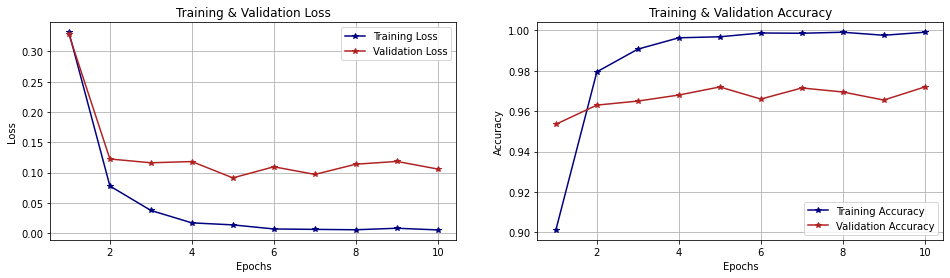

In [ ]:
show_plots(xcept_history.history)

##Make predictions and CSV file

In [ ]:
y_hat_probs = xcept_mod.predict(X_Xcept_val)
y_hat = np.argmax(y_hat_probs, axis = 1) + 1
df = pd.DataFrame(y_hat, 
             columns=['label'])
df.to_csv('predic.csv', index=True, index_label='id')

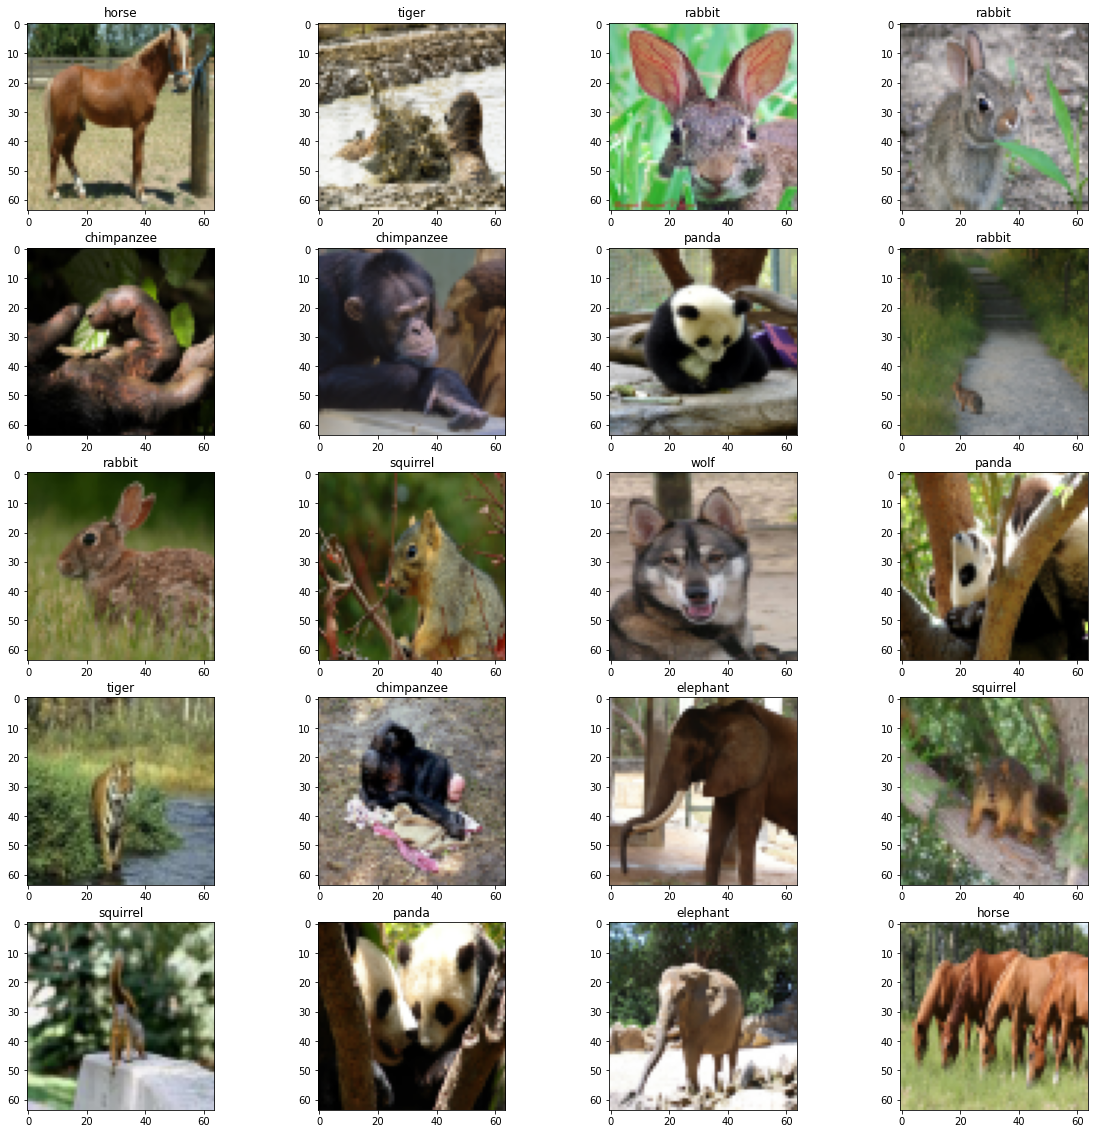

In [ ]:
fig=plt.figure(figsize=(20, 20))
columns = 4
rows = 5
for i in range(0, columns*rows):
    img = X_val[i]
    f = fig.add_subplot(rows, columns, i + 1)
    f.set_title(label2name[y_hat[i]])
    plt.imshow(img)
plt.show()

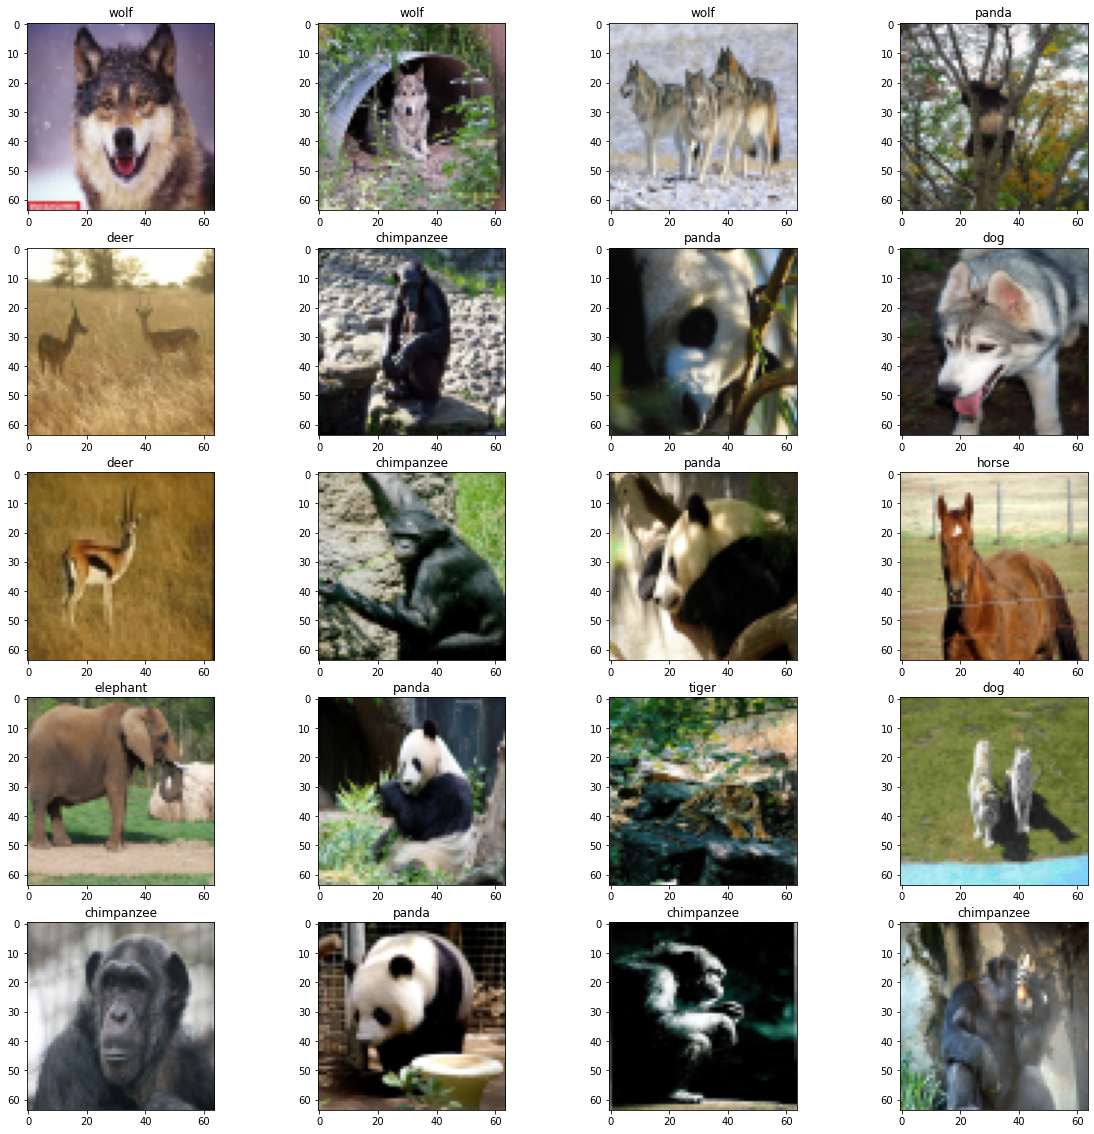

In [ ]:
m = X_val.shape[0]
fig=plt.figure(figsize=(20, 20))
columns = 4
rows = 5
for i in range(m - columns*rows, m):
    img = X_val[i]
    f = fig.add_subplot(rows, columns, i + 1 - (m - columns * rows))
    f.set_title(label2name[y_hat[i]])
    plt.imshow(img)
plt.show()